## Observations and Insights 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')

# Display the data table for preview
merged_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice.
merged_study_df['Mouse ID'].value_counts()

g989    13
o287    10
e476    10
z795    10
l509    10
        ..
v199     1
h428     1
t573     1
o848     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_df = merged_study_df[merged_study_df.duplicated(['Mouse ID','Timepoint'])]
duplicate_mouse_df = duplicate_mouse_df[['Mouse ID','Timepoint']]
duplicate_mouse_df

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [16]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df_all = merged_study_df[merged_study_df.duplicated(['Mouse ID','Timepoint'])]
duplicate_mouse_df_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = merged_study_df[~merged_study_df['Mouse ID'].isin(['g989'])]
cleaned_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Checking the number of mice in the clean DataFrame.
cleaned_data_df['Mouse ID'].value_counts()

o287    10
e476    10
k894    10
z795    10
l509    10
        ..
v199     1
h428     1
t573     1
o848     1
b447     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor... 
# ...volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_min = cleaned_data_df['Tumor Volume (mm3)'].groupby(cleaned_data_df['Drug Regimen']).min()
tumor_max = cleaned_data_df['Tumor Volume (mm3)'].groupby(cleaned_data_df['Drug Regimen']).max()
tumor_mean = cleaned_data_df['Tumor Volume (mm3)'].groupby(cleaned_data_df['Drug Regimen']).mean()
tumor_median = cleaned_data_df['Tumor Volume (mm3)'].groupby(cleaned_data_df['Drug Regimen']).median()
tumor_variance = cleaned_data_df['Tumor Volume (mm3)'].groupby(cleaned_data_df['Drug Regimen']).var()
tumor_std_dev = cleaned_data_df['Tumor Volume (mm3)'].groupby(cleaned_data_df['Drug Regimen']).std()
tumor_sem = cleaned_data_df['Tumor Volume (mm3)'].groupby(cleaned_data_df['Drug Regimen']).sem()

tumor_volume_df = pd.DataFrame({
    'Tumor Min': tumor_min,
    'Tumor Max': tumor_max,
    'Tumor Mean': tumor_mean,
    'Tumor Median': tumor_median,
    'Tumor Variance': tumor_variance,
    'Tumor Std. Dev.': tumor_std_dev,
    'Tumor SEM': tumor_sem
    
})

tumor_volume_df




,Tumor Min,Tumor Max,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std. Dev.,Tumor SEM
Drug Regimen,,,,,,,
Capomulin,23.343598,48.158209,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,45.000000,68.923185,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,36.321346,72.226731,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,45.000000,78.567014,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,45.000000,76.668817,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,45.000000,73.212939,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,45.000000,72.455421,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,22.050126,47.622816,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,45.000000,75.123690,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_data = cleaned_data_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['min','max','mean','median','var','std','sem']})
aggregated_data


Tumor Volume (mm3)                                              \
                            min        max       mean     median        var   
Drug Regimen                                                                  
Capomulin             23.343598  48.158209  40.675741  41.557809  24.947764   
Ceftamin              45.000000  68.923185  52.591172  51.776157  39.290177   
Infubinol             36.321346  72.226731  52.884795  51.820584  43.128684   
Ketapril              45.000000  78.567014  55.235638  53.698743  68.553577   
Naftisol              45.000000  76.668817  54.331565  52.509285  66.173479   
Placebo               45.000000  73.212939  54.033581  52.288934  61.168083   
Propriva              45.000000  72.455421  52.320930  50.446266  43.852013   
Ramicane              22.050126  47.622816  40.216745  40.673236  23.486704   
Stelasyn              45.000000  75.123690  54.233149  52.431737  59.450562   
Zoniferol             45.000000  73.324432  53.236507  51.818479  48.533355   

                                  
                   std       sem  
Drug Regimen                      
Capomulin     4.994774  0.329346  
Ceftamin      6.268188  0.469821  
Infubinol     6.567243  0.492236  
Ketapril      8.279709  0.603860  
Naftisol      8.134708  0.596466  
Placebo       7.821003  0.581331  
Propriva      6.622085  0.544332  
Ramicane      4.846308  0.320955  
Stelasyn      7.710419  0.573111  
Zoniferol     6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Measurements Taken')

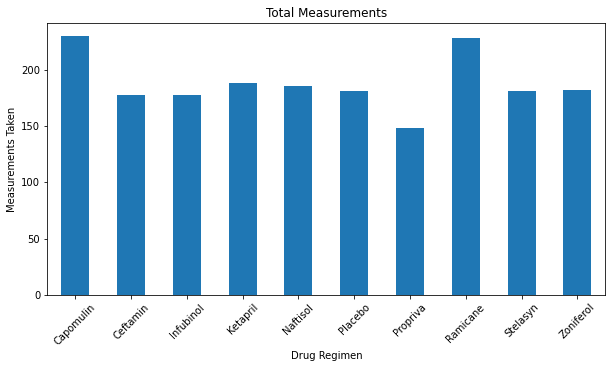

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen = cleaned_data_df.groupby('Drug Regimen')
total_measurements = drug_regimen['Tumor Volume (mm3)'].count()
drug_regimen_chart = total_measurements.plot(kind = 'bar' , title = 'Total Measurements', align='center', figsize = (10,5), rot = 45)
drug_regimen_chart.set_ylabel('Measurements Taken')


Text(0, 0.5, 'Measurements Taken')

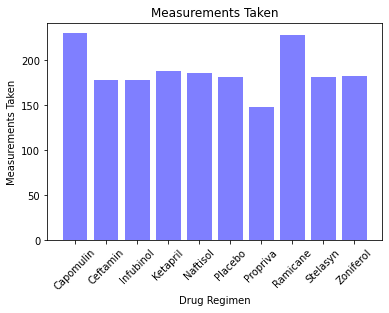

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_regimen))
y_axis = total_measurements

plt.bar(x_axis, y_axis, color= 'b', alpha = 0.5)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation=45)

plt.title('Measurements Taken')
plt.xlabel('Drug Regimen')
plt.ylabel('Measurements Taken')



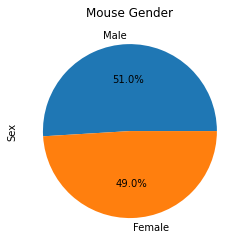

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = cleaned_data_df['Sex'].value_counts()
gender_data.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Mouse Gender')
plt.show()




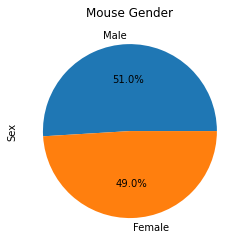

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male, Female'
sizes = gender_data
plot = gender_data.plot.pie(y='Count', autopct = '%1.1f%%')
plt.title('Mouse Gender')
plt.show()



## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_volume = cleaned_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_volume.reset_index()
#final_volume

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint



In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#final_tumor_df = final_volume.reset_index()
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(tumor_vol_list)
    
    quartiles = final_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_volume.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    
    # Determine outliers using upper and lower bounds
    outliers = final_volume.loc[(final_volume < lower_bound) 
                  | (final_volume > upper_bound)]
    
    print(f'Possible {drug} Outliers')
    print(f'Tumor volume for {drug} below {lower_bound} could be outlier.')
    print(f'Tumer volume for {drug} above {upper_bound} could be outlier.')

    

Possible Capomulin Outliers
Tumor volume for Capomulin below 20.70456164999999 could be outlier.
Tumer volume for Capomulin above 51.83201549 could be outlier.
Possible Ramicane Outliers
Tumor volume for Ramicane below 17.912664470000003 could be outlier.
Tumer volume for Ramicane above 54.30681135 could be outlier.
Possible Infubinol Outliers
Tumor volume for Infubinol below 36.83290494999999 could be outlier.
Tumer volume for Infubinol above 82.74144559000001 could be outlier.
Possible Ceftamin Outliers
Tumor volume for Ceftamin below 25.355449580000002 could be outlier.
Tumer volume for Ceftamin above 87.66645829999999 could be outlier.


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, final_volume_box = plt.subplots()
final_volume_box.boxplot(tumor_vol_list, labels = treatment_regimen, widths = 0.4, vert = True)

final_volume_box.set_title('Final Tumor Volume')
final_volume_box.set_xlabel('Drug Regimen')
final_volume_box.set_ylabel('Final Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
